In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_score'}, inplace=True)

<Axes: >

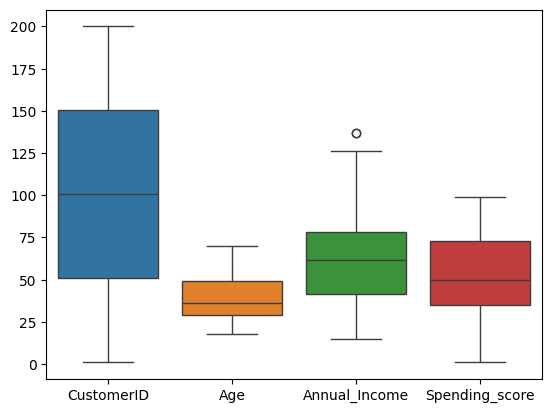

In [14]:
sns.boxplot(data)

In [28]:
x=data.iloc[:,[3,4]].values

In [29]:
from sklearn.cluster import KMeans

In [30]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

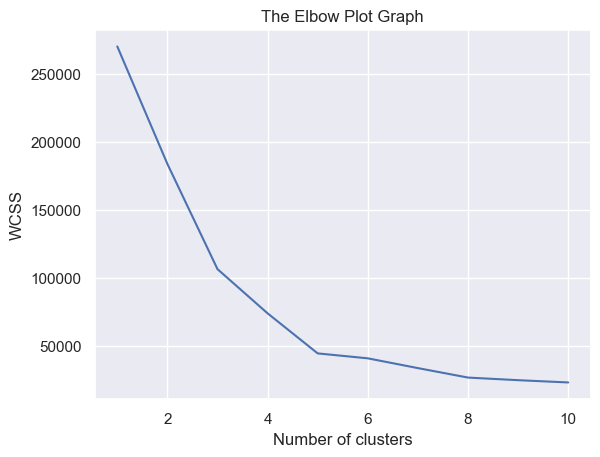

In [31]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Plot Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Optimal value for clusters : 5

In [32]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=0)
y=kmeans.fit_predict(x)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


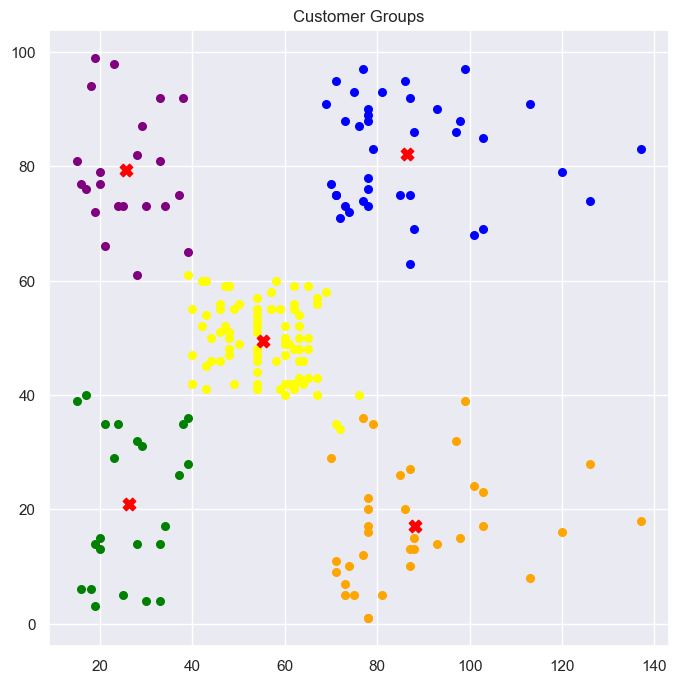

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=30,c="yellow",label="Cluster 1")
plt.scatter(x[y==1,0],x[y==1,1],s=30,c="blue",label="Cluster 2")
plt.scatter(x[y==2,0],x[y==2,1],s=30,c="orange",label="Cluster 3")
plt.scatter(x[y==3,0],x[y==3,1],s=30,c="green",label="Cluster 4")
plt.scatter(x[y==4,0],x[y==4,1],s=30,c="purple",label="Cluster 5")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=80, c="red", label="Centroids", marker='X')
plt.title("Customer Groups")
plt.show()